# Modelagem Preditiva – IMDb

Nesta etapa do projeto, foi desenvolvido um modelo preditivo para estimar a nota de filmes no IMDb com base em variáveis como duração, gênero, bilheteria, número de votos e avaliação da crítica. O objetivo é identificar padrões que possam orientar decisões estratégicas na escolha de futuras produções cinematográficas.

O processo inclui:
- Seleção e transformação de variáveis relevantes
- Codificação de gêneros com One-Hot Encoding
- Treinamento de modelo de regressão (Random Forest)
- Avaliação de desempenho com métricas como MSE e R²
- Teste prático com dados reais de filmes conhecidos

Este notebook complementa a análise exploratória e os relatórios interpretativos, consolidando a etapa de previsão dentro do desafio Lighthouse CD.

In [25]:
# Instalação de Bibliotecas
!pip install scikit-learn pandas numpy joblib

# Importando as bibliotecas essenciais.
import pandas as pd
import numpy as np
import joblib
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [26]:
# Carregamento dos Dados
from google.colab import drive
drive.mount('/content/drive')

caminho_do_arquivo = '/content/drive/MyDrive/Análise IMDB/desafio_indicium_imdb.csv'

try:
    df = pd.read_csv(caminho_do_arquivo)
    print("\nDados carregados! Visualizando as 5 primeiras linhas:")
    print(df.head())
    print("\nInformações sobre o dataset:")
    df.info()
except FileNotFoundError:
    print(f"\nErro: O arquivo '{caminho_do_arquivo}' não foi encontrado.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dados carregados! Visualizando as 5 primeiras linhas:
   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min

In [27]:
# Limpeza da coluna Runtime
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
print("\nColuna Runtime limpa!")
print(df['Runtime'].head())
print("\nInformações atualizadas sobre o dataset:")
df.info()


Coluna Runtime limpa!
0    175
1    152
2    202
3     96
4    201
Name: Runtime, dtype: int64

Informações atualizadas sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gros

In [28]:
# Convertendo a coluna 'Released_Year' para tipo numérico, transformando erros em NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Removendo as linhas onde a coluna 'Released_Year' possui valores NaN
df.dropna(subset=['Released_Year'], inplace=True)

# Convertendo a coluna para tipo inteiro
df['Released_Year'] = df['Released_Year'].astype(int)

# Verificando as mudanças
print("Colunas 'Released_Year' após a limpeza:")
print(df['Released_Year'].head())
print("\nInformações do DataFrame para confirmar a mudança de tipo de dado:")
df.info()


Colunas 'Released_Year' após a limpeza:
0    1972
1    2008
2    1974
3    1957
4    2003
Name: Released_Year, dtype: int64

Informações do DataFrame para confirmar a mudança de tipo de dado:
<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     998 non-null    int64  
 1   Series_Title   998 non-null    object 
 2   Released_Year  998 non-null    int64  
 3   Certificate    897 non-null    object 
 4   Runtime        998 non-null    int64  
 5   Genre          998 non-null    object 
 6   IMDB_Rating    998 non-null    float64
 7   Overview       998 non-null    object 
 8   Meta_score     841 non-null    float64
 9   Director       998 non-null    object 
 10  Star1          998 non-null    object 
 11  Star2          998 non-null    object 
 12  Star3          998 non-null    object 
 13  Star4          998 non-null    object 
 14 

In [29]:
# Removendo as vírgulas da coluna 'Gross'
df['Gross'] = df['Gross'].str.replace(',', '')

# Convertendo a coluna 'Gross' para o tipo float para que seja numérica
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Verificando as mudanças
print("Colunas 'Gross' após a limpeza:")
print(df['Gross'].head())
print("\nInformações do DataFrame para confirmar a mudança de tipo de dado:")
df.info()

Colunas 'Gross' após a limpeza:
0    134966411.0
1    534858444.0
2     57300000.0
3      4360000.0
4    377845905.0
Name: Gross, dtype: float64

Informações do DataFrame para confirmar a mudança de tipo de dado:
<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     998 non-null    int64  
 1   Series_Title   998 non-null    object 
 2   Released_Year  998 non-null    int64  
 3   Certificate    897 non-null    object 
 4   Runtime        998 non-null    int64  
 5   Genre          998 non-null    object 
 6   IMDB_Rating    998 non-null    float64
 7   Overview       998 non-null    object 
 8   Meta_score     841 non-null    float64
 9   Director       998 non-null    object 
 10  Star1          998 non-null    object 
 11  Star2          998 non-null    object 
 12  Star3          998 non-null    object 
 13  Star4          998 non

In [30]:
# Removendo todas as linhas que contêm pelo menos um valor ausente (NaN).
# O parâmetro 'inplace=True' modifica o DataFrame diretamente.
df.dropna(inplace=True)

# Verificando as mudanças
print("Shape do DataFrame após a remoção de valores ausentes:")
print(df.shape)
print("\nInformações do DataFrame para confirmar que não há mais valores nulos:")
df.info()

Shape do DataFrame após a remoção de valores ausentes:
(712, 16)

Informações do DataFrame para confirmar que não há mais valores nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 996
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     712 non-null    int64  
 1   Series_Title   712 non-null    object 
 2   Released_Year  712 non-null    int64  
 3   Certificate    712 non-null    object 
 4   Runtime        712 non-null    int64  
 5   Genre          712 non-null    object 
 6   IMDB_Rating    712 non-null    float64
 7   Overview       712 non-null    object 
 8   Meta_score     712 non-null    float64
 9   Director       712 non-null    object 
 10  Star1          712 non-null    object 
 11  Star2          712 non-null    object 
 12  Star3          712 non-null    object 
 13  Star4          712 non-null    object 
 14  No_of_Votes    712 non-null    int64  
 15  Gross     

##  Engenharia de Features

In [31]:
# Tratamento da coluna 'Genre' com One-Hot Encoding
df['Genre'] = df['Genre'].str.lower().str.strip()
genres_expanded = df['Genre'].str.get_dummies(sep=', ')
df['No_of_Votes'] = np.log1p(df['No_of_Votes'])
df['Gross'] = np.log1p(df['Gross'])

# Verificando dos novos dados
print("Primeiras 5 linhas das novas colunas de Gênero:")
print(genres_expanded.head())
print("\nPrimeiras 5 linhas das colunas transformadas (log):")
print(df[['No_of_Votes', 'Gross']].head())

Primeiras 5 linhas das novas colunas de Gênero:
   action  adventure  animation  biography  comedy  crime  drama  family  \
0       0          0          0          0       0      1      1       0   
1       1          0          0          0       0      1      1       0   
2       0          0          0          0       0      1      1       0   
3       0          0          0          0       0      1      1       0   
4       1          1          0          0       0      0      1       0   

   fantasy  film-noir  ...  horror  music  musical  mystery  romance  sci-fi  \
0        0          0  ...       0      0        0        0        0       0   
1        0          0  ...       0      0        0        0        0       0   
2        0          0  ...       0      0        0        0        0       0   
3        0          0  ...       0      0        0        0        0       0   
4        0          0  ...       0      0        0        0        0       0   

   sport  thri

## Construção e Treinamento do Modelo

In [32]:
# Definindo as variáveis que o modelo irá usar
# 'IMDB_Rating' é a variável alvo (y)
y = df['IMDB_Rating']

features_numericas = ['Released_Year', 'Runtime', 'No_of_Votes', 'Gross', 'Meta_score']
X = pd.concat([df[features_numericas], genres_expanded], axis=1)

# Dividindo os dados para treino e teste (80% para treino, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dados divididos em conjuntos de treino e teste.")

# Treinando o modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

# Fazendo previsões nos dados de teste
y_pred = modelo_rf.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Resultados de Desempenho do Modelo ---")
print(f"MSE (Erro Quadrático Médio): {mse:.4f}")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")

# Salva o modelo treinado em um arquivo .pkl para uso futuro
joblib.dump(modelo_rf, 'modelo_imdb.pkl')
print("\nModelo salvo com sucesso!")

Dados divididos em conjuntos de treino e teste.
Modelo treinado com sucesso!

--- Resultados de Desempenho do Modelo ---
MSE (Erro Quadrático Médio): 0.0351
R² (Coeficiente de Determinação): 0.5809

Modelo salvo com sucesso!


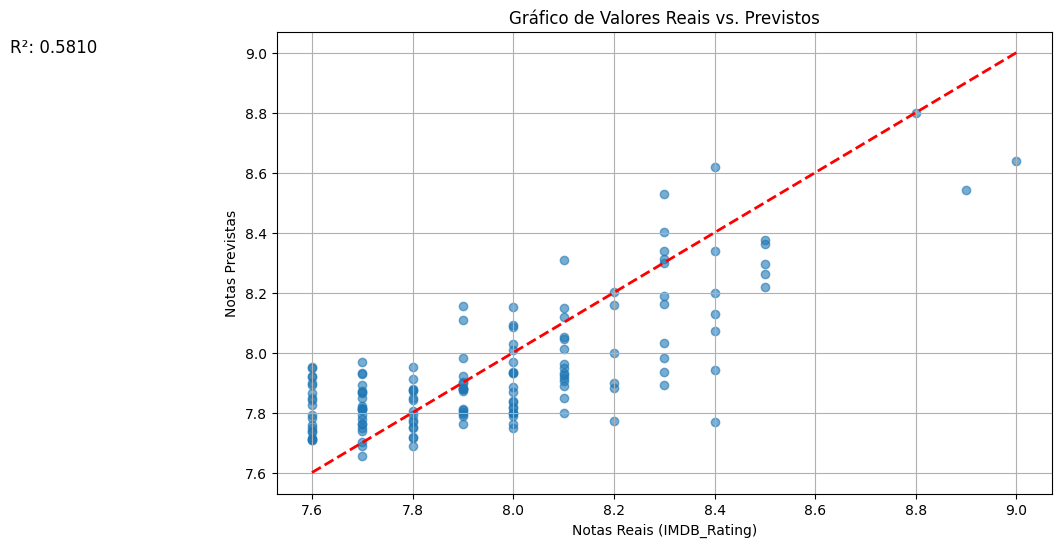

In [33]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)

# Adicionando a linha de regressão ideal (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Adicionando o valor do R² no gráfico
r2_valor = 0.5810
plt.text(x=7.0, y=9.0, s=f'R²: {r2_valor:.4f}', fontsize=12, color='black')

plt.xlabel('Notas Reais (IMDB_Rating)')
plt.ylabel('Notas Previstas')
plt.title('Gráfico de Valores Reais vs. Previstos')
plt.grid(True)
plt.show()

## Teste Prático do Modelo com Dados Reais


In [34]:
# Dados do filme
filme = {
    'Released_Year': 1994,
    'Runtime': 142,
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Gross': 28341469,
    'Genre': 'drama'
}

# Transformações logarítmicas
filme['No_of_Votes'] = np.log1p(filme['No_of_Votes'])
filme['Gross'] = np.log1p(filme['Gross'])

# Lista completa de gêneros usados no modelo (incluindo 'film-noir')
generos_modelo = [
    'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama',
    'family', 'fantasy', 'film-noir', 'history', 'horror', 'music', 'musical',
    'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western'
]

# One-Hot Encoding manual para o gênero do filme
generos_filme = filme['Genre'].lower().strip().split(', ')
generos_dummies = {g: int(g in generos_filme) for g in generos_modelo}

# Montando o DataFrame com todas as features
features_numericas = ['Released_Year', 'Runtime', 'No_of_Votes', 'Gross', 'Meta_score']
dados_filme = pd.DataFrame([{**{k: filme[k] for k in features_numericas}, **generos_dummies}])

# Fazendo a previsão diretamente com o modelo já treinado
nota_prevista = modelo_rf.predict(dados_filme)[0]
print(f"Nota prevista do IMDb para 'The Shawshank Redemption': {nota_prevista:.2f}")

Nota prevista do IMDb para 'The Shawshank Redemption': 8.79
